In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('black-sabbath.csv')
df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Black Sabbath,1,6KmJMlyPp0rPR7LloToCaF,Black Sabbath (2009 - Remaster),spotify:track:6KmJMlyPp0rPR7LloToCaF,0.09210,0.326,0.506,0.065900,0.159,-10.597,0.0393,133.527,0.105,16,Black Sabbath
1,Black Sabbath,2,02VKxjok07ypt3oFlGRjmH,The Wizard (2009 - Remaster),spotify:track:02VKxjok07ypt3oFlGRjmH,0.03600,0.497,0.792,0.000294,0.317,-7.807,0.0874,99.697,0.369,13,Black Sabbath
2,Black Sabbath,3,5JYanX4zPe3uX3nShgE0qR,Behind the Wall of Sleep (2009 - Remaster),spotify:track:5JYanX4zPe3uX3nShgE0qR,0.00867,0.358,0.481,0.002970,0.297,-12.533,0.0352,90.750,0.708,7,Black Sabbath
3,Black Sabbath,4,3XclwoQxz4p6Dl7VUf90KW,N.I.B. (2009 - Remaster),spotify:track:3XclwoQxz4p6Dl7VUf90KW,0.14100,0.463,0.552,0.000010,0.129,-9.403,0.0605,105.495,0.421,26,Black Sabbath
4,Black Sabbath,5,046x8yuXjJFPaaQI6Iyz9e,"Evil Woman, Don't Play Your Games with Me (200...",spotify:track:046x8yuXjJFPaaQI6Iyz9e,0.00812,0.598,0.639,0.000003,0.170,-9.853,0.0403,137.007,0.714,7,Black Sabbath


In [3]:
df = df[['name','id','album','artist','energy','danceability','loudness', 'instrumentalness', 'popularity']]
df.head()

,name,id,album,artist,energy,danceability,loudness,instrumentalness,popularity
0,Black Sabbath (2009 - Remaster),6KmJMlyPp0rPR7LloToCaF,Black Sabbath,Black Sabbath,0.506,0.326,-10.597,0.065900,16
1,The Wizard (2009 - Remaster),02VKxjok07ypt3oFlGRjmH,Black Sabbath,Black Sabbath,0.792,0.497,-7.807,0.000294,13
2,Behind the Wall of Sleep (2009 - Remaster),5JYanX4zPe3uX3nShgE0qR,Black Sabbath,Black Sabbath,0.481,0.358,-12.533,0.002970,7
3,N.I.B. (2009 - Remaster),3XclwoQxz4p6Dl7VUf90KW,Black Sabbath,Black Sabbath,0.552,0.463,-9.403,0.000010,26
4,"Evil Woman, Don't Play Your Games with Me (200...",046x8yuXjJFPaaQI6Iyz9e,Black Sabbath,Black Sabbath,0.639,0.598,-9.853,0.000003,7


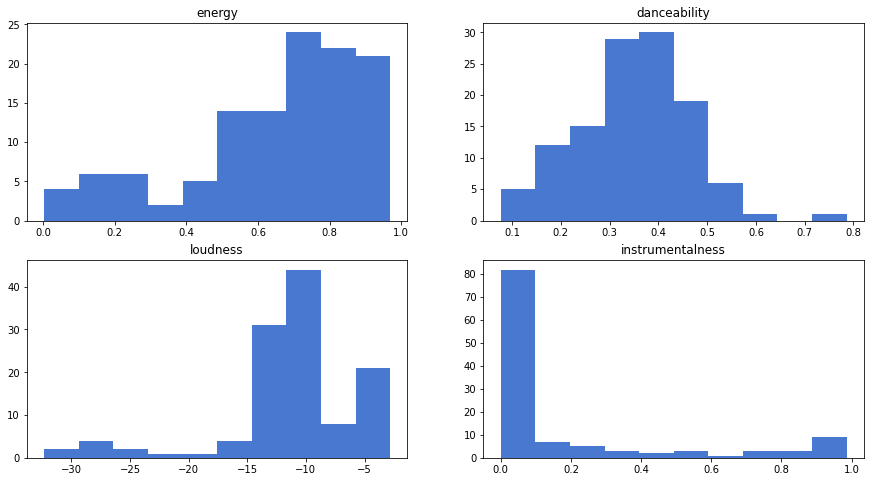

In [4]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['energy'])
axes[0,0].set_title('energy')
axes[0,1].hist(df['danceability'])
axes[0,1].set_title('danceability')
axes[1,0].hist(df['loudness'])
axes[1,0].set_title('loudness')
axes[1,1].hist(df['instrumentalness'])
axes[1,1].set_title('instrumentalness')
plt.show()

### Clustering

In [5]:
features = df.columns[4:8]

In [6]:
X = MinMaxScaler().fit_transform(df[features])

In [7]:
km = KMeans(init='k-means++', n_clusters=2, random_state=20).fit(X)

In [8]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df['labels']= km.labels_

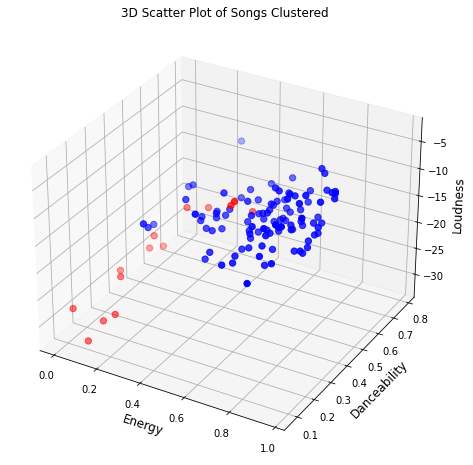

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['labels'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")
plt.show()

In [11]:
df.groupby(['labels']).mean()

,energy,danceability,loudness,instrumentalness,popularity
labels,,,,,
0,0.707173,0.350662,-9.832990,0.082917,7.788462
1,0.222141,0.336843,-22.251143,0.875786,3.714286


In [12]:
highEnergy_cluster = df[df['labels']==0]
lowEnergy_cluster = df[df['labels']==1]

highEnergy_cluster.to_csv('highEnergyCluster.csv', index=False)
lowEnergy_cluster.to_csv('lowEnergyCluster.csv', index=False)